In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

### 1. Understanding dataset


In [2]:
df = pd.read_csv("../data/german_credit_data.csv")

print(df.head())

df.drop(columns=['Unnamed: 0'], inplace=True)

print(f"Dataset shape: {df.shape}")

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  
Dataset shape: (1000, 10)


#### 1.2 Check for missing values & fill fix them

- think about possible reasons why data is missing


In [3]:
print(df.isnull().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


#### 1.2.1 Possible reasons for missing savings & checkings account

1. some customers might not have savings or checkings account
2. Institution collecting data might not have captured the required info
3. privacy / confidential concerns - customers may have chosen not to disclose their account balance
4. data cleaning / processing errors


In [4]:
missing_both_mask = df['Saving accounts'].isnull() & df['Checking account'].isnull()
missing_both_df = df[missing_both_mask]

missing_either_mask = df['Saving accounts'].isnull() | df['Checking account'].isnull()
missing_either_df = df[missing_either_mask]

print(missing_both_df.head())

print(missing_both_df.shape)

print(missing_either_df.shape)


    Age   Sex  Job Housing Saving accounts Checking account  Credit amount  \
5    35  male    1    free             NaN              NaN           9055   
16   53  male    2     own             NaN              NaN           2424   
24   26  male    2     own             NaN              NaN           2069   
33   57  male    1    rent             NaN              NaN           1264   
53   31  male    2     own             NaN              NaN           3378   

    Duration              Purpose  Risk  
5         36            education  good  
16        24             radio/TV  good  
24        10  furniture/equipment  good  
33        12             business  good  
53        18                  car  good  
(99, 10)
(478, 10)


#### 1.2.2 Handling missing values

- imputation : replace missing values with
  1. default values for categorical data like "No account"
  2. median or mean for numerical data
  3. mode for common categorical entries


In [5]:
df['Saving accounts'].fillna("No Account", inplace=True)
df['Checking account'].fillna("No Account", inplace=True)

/var/folders/fc/n6ycqzwx13989g40ry2djdsh0000gn/T/ipykernel_32021/3393488308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna("No Account", inplace=True)
/var/folders/fc/n6ycqzwx13989g40ry2djdsh0000gn/T/ipykernel_32021/3393488308.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [6]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

### 3 Summary Statistics & Data description

- identify features that are categorical, numerical, data/time
- generate summary statistics for numerical features to identify potential anomalies

  - Age (numeric)
  - Sex (text: male, female)
  - Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
  - Housing (text: own, rent, or free)
  - Saving accounts (text - little, moderate, quite rich, rich)
  - Checking account (numeric, in DM - Deutsch Mark)
  - Credit amount (numeric, in DM)
  - Duration (numeric, in month)
  - Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


In [7]:
print(df.dtypes)

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include='object').columns

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object
Numerical Features: Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')
Categorical Features: Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')


In [8]:
print(df.describe())
print()
print(df[categorical_features].describe())

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

         Sex Housing Saving accounts Checking account Purpose  Risk
count   1000    1000            1000             1000    1000  1000
unique     2       3               5                4       8     2
top     male     own          little       No Account     car  good
freq     690     713             603              394     337   700


#### 3.1 identify duplicates


In [9]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df = df.drop_duplicates()

Number of duplicate rows: 0


### 4. Explore Target Variable & Feature Distribution


#### 4.1 Target Variable

    - understand distribution of target variable
    - credit risk: good vs bad


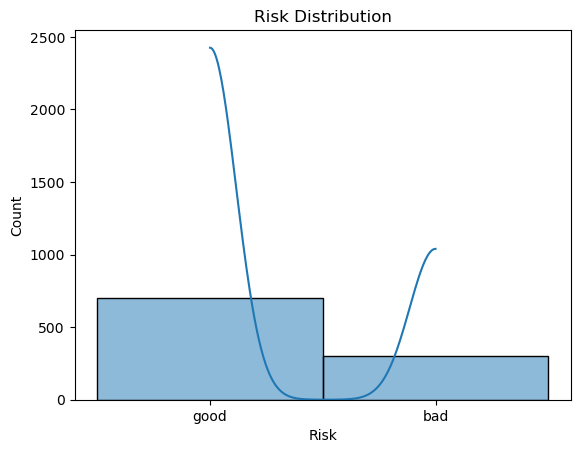

In [10]:
target = 'Risk'
sb.histplot(df[target], kde=True)
plt.title("Risk Distribution")
plt.show()

Risk
good    700
bad     300
Name: count, dtype: int64


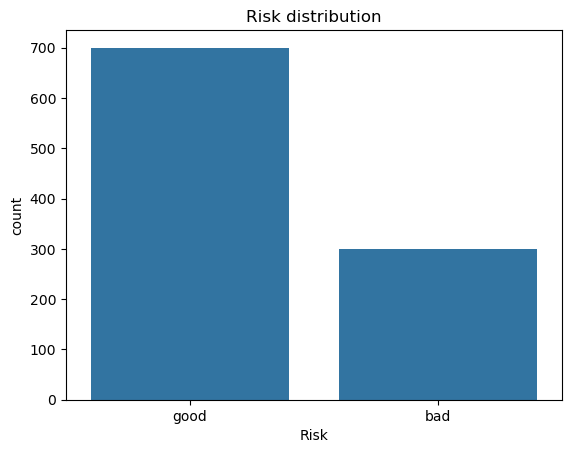

In [11]:
print(df[target].value_counts())
sb.countplot(x=target, data=df)
plt.title("Risk distribution")
plt.show()

#### 4.2 Feature exploration


- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Duration (numeric, in month)


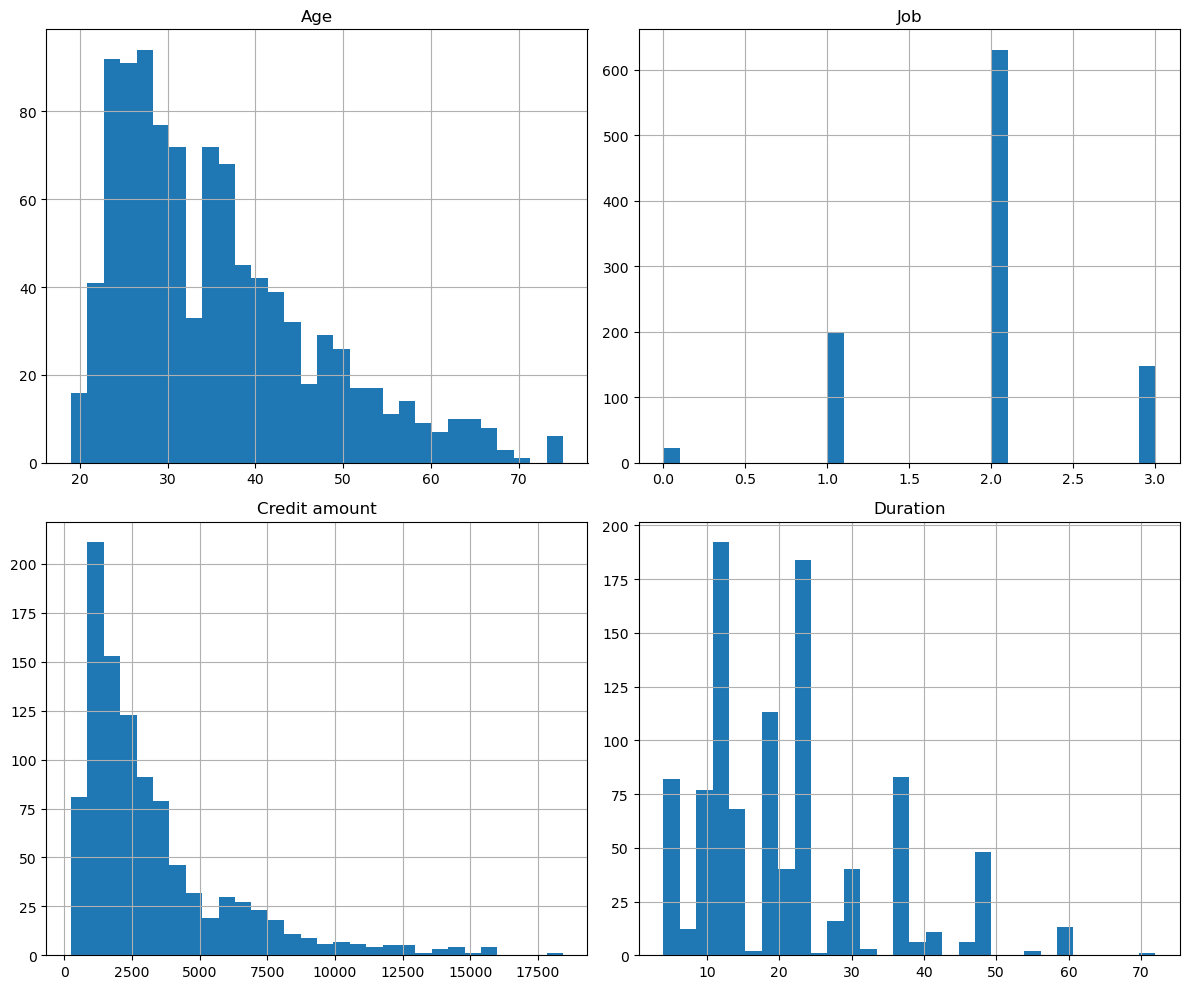

In [12]:
df[numerical_features].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

### 5. Handle Categorical Variables

- label encoding : use when categorical feature has ordinal relationship (order matters)
- 1-hot encoding : use when categorical feature has non-ordinal relationship (order doesnt matter)

label-encoding: - Saving accounts - Checking account

1-hot encoding: - sex - housing - purpose


In [13]:
df[categorical_features]

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
0,male,own,No Account,little,radio/TV,good
1,female,own,little,moderate,radio/TV,bad
2,male,own,little,No Account,education,good
3,male,free,little,little,furniture/equipment,good
4,male,free,little,little,car,bad
...,...,...,...,...,...,...
995,female,own,little,No Account,furniture/equipment,good
996,male,own,little,little,car,good
997,male,own,little,No Account,radio/TV,good
998,male,free,little,little,radio/TV,bad


In [14]:
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,No Account,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,No Account,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [15]:
# label encoding
le = LabelEncoder()
label_columns = ['Saving accounts', 'Checking account', 'Risk']
for col in label_columns:
    df[col] = le.fit_transform(df[col])

# 1-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Housing', 'Purpose'], drop_first=True)
df = df.astype(int)


In [16]:
df.head(5)

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,0,1,1169,6,1,1,1,0,0,0,0,0,1,0,0
1,22,2,1,2,5951,48,0,0,1,0,0,0,0,0,1,0,0
2,49,1,1,0,2096,12,1,1,1,0,0,0,1,0,0,0,0
3,45,2,1,1,7882,42,1,1,0,0,0,0,0,1,0,0,0
4,53,2,1,1,4870,24,0,1,0,0,1,0,0,0,0,0,0


#### 1: Mutual Information (Both Continuous & Discrete)

- measures dependency between a feature and the target
- captures non-linear r/s
- suitable for both continuous & discrete features
- features with higher mutual info scores more useful for logistic regression

#### Details on Mutual Information

- MI scores are always non-negative
- A score of 0 means feature provides no info about target
- In many datasets, MI scores are often small (eg < 0.1>) esp. when features have weak predictive power
- score depends on dataset, feature distributions and relationship to target


In [17]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information
X = df.drop(columns='Risk')  # Features
y = df['Risk']  # Target variable

mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Mutual Information Scores:")
print(mi_scores)

Mutual Information Scores:
Checking account               0.087931
Duration                       0.039452
Job                            0.037236
Housing_rent                   0.028845
Credit amount                  0.016567
Purpose_radio/TV               0.011115
Purpose_car                    0.010047
Saving accounts                0.009257
Housing_own                    0.008501
Purpose_education              0.005201
Purpose_repairs                0.004963
Purpose_furniture/equipment    0.000449
Age                            0.000000
Sex_male                       0.000000
Purpose_domestic appliances    0.000000
Purpose_vacation/others        0.000000
dtype: float64


### 6 Exploring Feature Correlations

    - examine numerical features with target variable
    - Logistic Regression utilize some sort of linear regression for numerical values


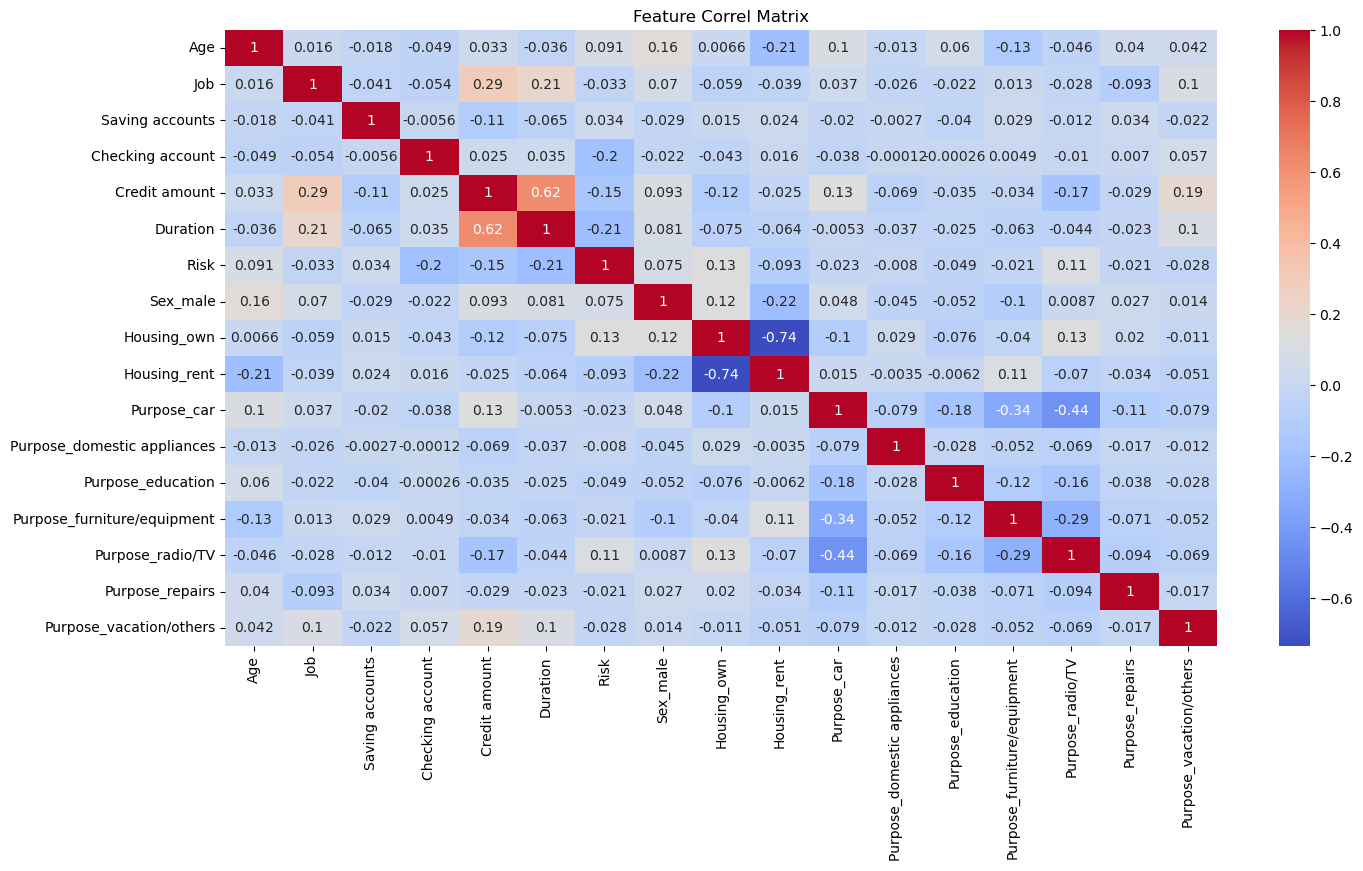

In [18]:
correl_matrix = df.corr()

plt.figure(figsize=(16, 8))
sb.heatmap(correl_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correl Matrix")
plt.show()

In [19]:
df.head(5)

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,0,1,1169,6,1,1,1,0,0,0,0,0,1,0,0
1,22,2,1,2,5951,48,0,0,1,0,0,0,0,0,1,0,0
2,49,1,1,0,2096,12,1,1,1,0,0,0,1,0,0,0,0
3,45,2,1,1,7882,42,1,1,0,0,0,0,0,1,0,0,0
4,53,2,1,1,4870,24,0,1,0,0,1,0,0,0,0,0,0


### 7 Check for outliers

- outliers can skew results, especially for regression task


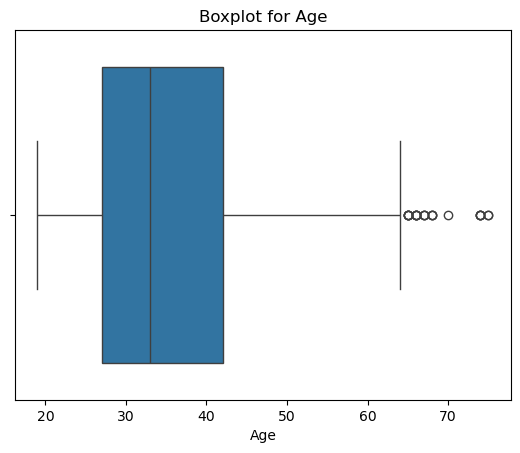

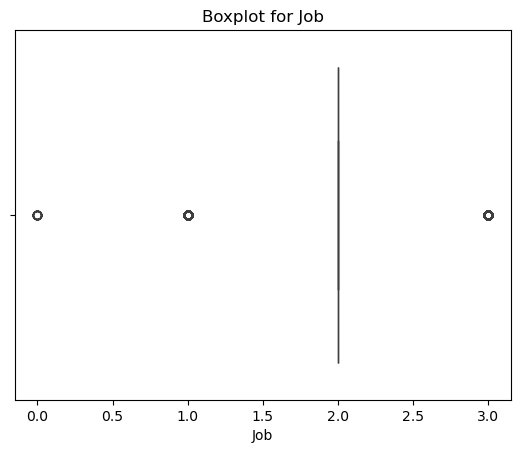

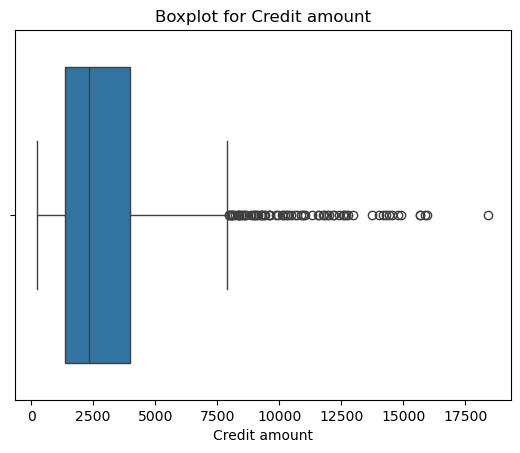

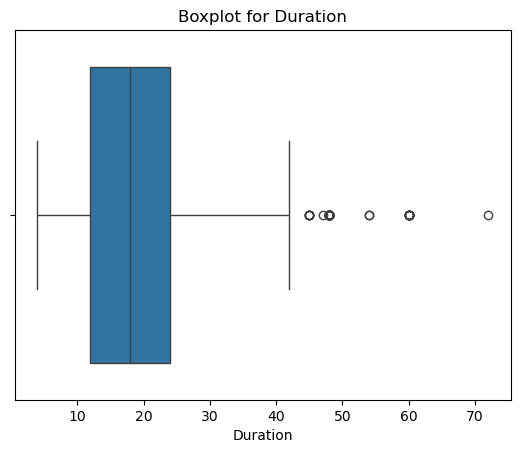

In [20]:
for col in numerical_features:
    sb.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [21]:
df.head(5)

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,0,1,1169,6,1,1,1,0,0,0,0,0,1,0,0
1,22,2,1,2,5951,48,0,0,1,0,0,0,0,0,1,0,0
2,49,1,1,0,2096,12,1,1,1,0,0,0,1,0,0,0,0
3,45,2,1,1,7882,42,1,1,0,0,0,0,0,1,0,0,0
4,53,2,1,1,4870,24,0,1,0,0,1,0,0,0,0,0,0


### 8 Split data for modelling

From Mutual Score:

Mutual Information Scores:

- Checking account 0.087931
- Duration 0.039452
- Job 0.037236
- Housing_rent 0.028845
- Credit amount 0.016567
- Purpose_radio/TV 0.011115
- Purpose_car 0.010047
- Saving accounts 0.009257
- Housing_own 0.008501
- Purpose_education 0.005201
- Purpose_repairs 0.004963
- Purpose_furniture/equipment 0.000449


In [22]:
df.columns

Index(['Age', 'Job', 'Saving accounts', 'Checking account', 'Credit amount',
       'Duration', 'Risk', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split
feature_cols = ['Checking account', 'Duration', 'Job', 'Housing_rent', 'Credit amount', 'Purpose_radio/TV', 'Purpose_car', 'Saving accounts', 'Housing_own', 'Purpose_education', 'Purpose_repairs', 'Purpose_furniture/equipment']
X = df[feature_cols]  # Features
y = df[target]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (800, 12)
Testing set shape: (200, 12)


### 9 Set up Logistic Regression model

    - gradient descent to optimize coefficients for sigmoid function


In [24]:
import numpy as np
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
class RiskLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        # Ensure z is a NumPy array or compatible scalar
        z = np.array(z) if not isinstance(z, np.ndarray) else z
        return 1 / (1 + np.exp(-z))

    def train(self, X, y):
        n_samples, n_features = X.shape
        # weights here represent the feature coefficients B1, B2, B3 etc.
        self.weights = np.zeros(n_features)  # Initialize weights as zeros
        self.bias = 0

        for i in range(self.num_iterations):
            # Linear model: z = w^T * X + b
            linear_equation = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_equation)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

### Training The Model


In [26]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
log_reg = RiskLogisticRegression(learning_rate=0.01, num_iterations=5000)
log_reg.train(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# train_loss = log_loss(y_train, [log_reg.sigmoid(np.dot(X_train[i], log_reg.weights) + log_reg.bias) for i in range(len(X_train))])
# test_loss = log_loss(y_test, [log_reg.sigmoid(np.dot(X_test[i], log_reg.weights) + log_reg.bias) for i in range(len(X_test))])

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
# print(f"Train Log Loss: {train_loss}")
# print(f"Test Log Loss: {test_loss}")

Train Accuracy: 0.7075
Test Accuracy: 0.725


### Binary Classification Metrics


In [36]:
df[target]

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [38]:
type(y_train)

pandas.core.series.Series

In [41]:
type(y_pred_train)

list

In [ ]:
y_train_actual = np.array(y_train)
y_test_actual = np.array(y_test)

y_train_pred = np.array(y_pred_train)
y_test_pred = np.array(y_pred_test)

def getTP(y_actl, y_pred):
    return np.sum((y_actl == 1) & (y_pred == 1))

def getFP(y_actl, y_pred):
    return np.sum((y_actl == 0) & (y_pred == 1))

def getTN(y_actl, y_pred):
    return np.sum((y_actl == 0) & (y_pred == 0))

def getFN(y_actl, y_pred):
    return np.sum((y_actl == 1) & (y_pred == 0))

def getAccuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

def getPrecision(TP, FP):
    return TP / (TP + FP) if (TP + FP) != 0 else 0

def getRecall(TP, FN):
    return TP / (TP + FN) if (TP + FN) != 0 else 0

def getF1Score(precision, recall):
    return 2 * ( (precision * recall) / (precision + recall) )

train_TP = getTP(y_train_actual, y_train_pred)
train_FP = getFP(y_train_actual, y_train_pred)
train_TN = getTN(y_train_actual, y_train_pred)
train_FN = getFN(y_train_actual, y_train_pred)

test_TP = getTP(y_test_actual, y_test_pred)
test_FP = getFP(y_test_actual, y_test_pred)
test_TN = getTN(y_test_actual, y_test_pred)
test_FN = getFN(y_test_actual, y_test_pred)

In [28]:
compare_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

In [29]:
print(compare_df)
compare_df[compare_df['Actual'] == compare_df['Predicted']]

     Actual  Predicted
521       0          1
737       1          1
740       1          1
660       1          1
411       1          1
..      ...        ...
408       1          1
332       0          0
208       1          1
613       1          1
78        1          1

[200 rows x 2 columns]


,Actual,Predicted
737,1,1
740,1,1
660,1,1
411,1,1
678,1,1
...,...,...
408,1,1
332,0,0
208,1,1
613,1,1
